# Tensorflow

In [1]:
# models, utils 임포트
from tensorflow.keras import models, utils, layers

## Sequential API

In [2]:
# add 방식
model = models.Sequential()
model.add(layers.Input(shape=(28, 28)))
model.add(layers.Dense(300, activation="relu"))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 28, 300)        │         8,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28, 100)        │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 28, 10)         │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,810 (155.51 KB)

 Trainable params: 39,810 (155.51 KB)

 Non-trainable params: 0 (0.00 B)

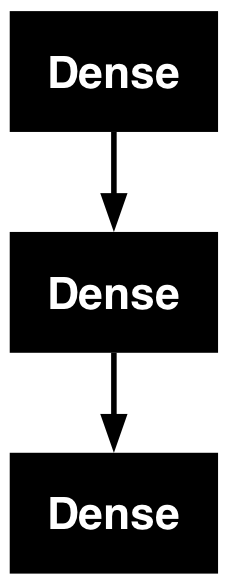

In [3]:
# 시각화
utils.plot_model(model)

In [4]:
# 생성자 방식
model = models.Sequential([
    layers.Input(shape=(28, 28), name="Input"),
    layers.Dense(300, activation="relu", name="Dense1"),
    layers.Dense(100, activation="relu", name="Dense2"),
    layers.Dense(10, activation="softmax", name="Output")
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense1 (Dense)                  │ (None, 28, 300)        │         8,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 28, 100)        │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 28, 10)         │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,810 (155.51 KB)

 Trainable params: 39,810 (155.51 KB)

 Non-trainable params: 0 (0.00 B)

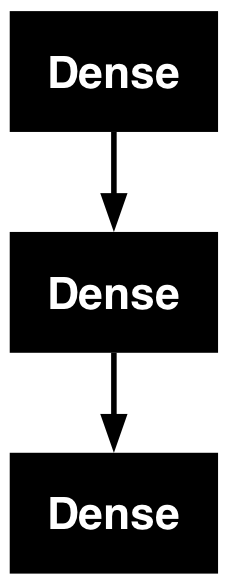

In [5]:
utils.plot_model(model)

## Functional API

In [6]:
inputs = layers.Input(shape=(28, 28))
x = layers.Flatten()(inputs)
x = layers.Dense(300, activation="relu")(x)
x = layers.Dense(100, activation="relu")(x)
x = layers.Dense(10, activation="softmax")(x)

model = models.Model(inputs=inputs, outputs=x)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

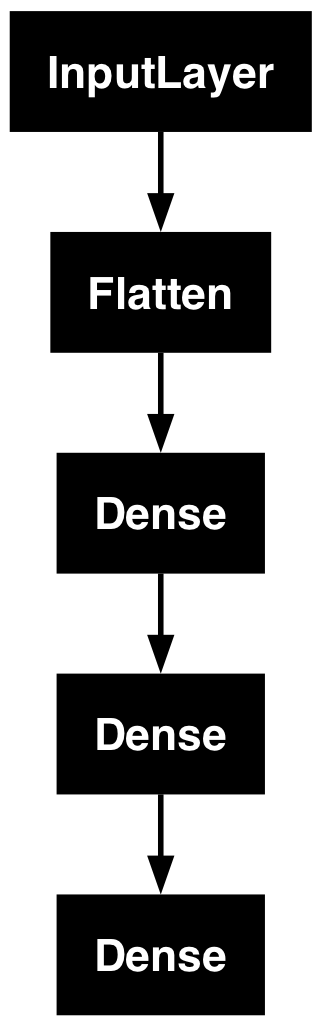

In [7]:
utils.plot_model(model)

## Concatenate

In [8]:
inputs = layers.Input(shape=(28, 28))
hidden1 = layers.Dense(100, activation="relu")(inputs)
hidden2 = layers.Dense(30, activation="relu")(hidden1)
concat = layers.Concatenate()([inputs, hidden2])
output = layers.Dense(1)(concat)

model = models.Model(inputs=[inputs], outputs=[output])
model.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 28, 100)   │      2,900 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 28, 30)    │      3,030 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 28, 58)    │          0 │ input_layer_2[0]… │
│ (Concatenate)       │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 28, 1)     │         59 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,989 (23.39 KB)

 Trainable params: 5,989 (23.39 KB)

 Non-trainable params: 0 (0.00 B)

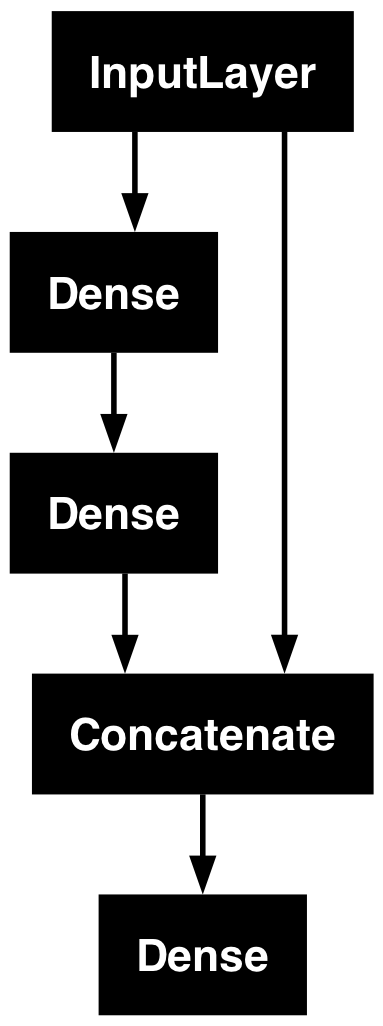

In [9]:
utils.plot_model(model)

## Multi Input

In [10]:
input_1 = layers.Input(shape=(10, 10), name="Input_1")
input_2 = layers.Input(shape=(10, 28), name="Input_2")

hidden1 = layers.Dense(100, activation="relu")(input_2)
hidden2 = layers.Dense(10, activation="relu")(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation="sigmoid", name="output")(concat)

model = models.Model(inputs=[input_1, input_2], outputs=[output])
model.summary()



Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input_2             │ (None, 10, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 10, 100)   │      2,900 │ Input_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Input_1             │ (None, 10, 10)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 10, 10)    │      1,010 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 10, 20)    │          0 │ Input_1[0][0],    │
│ (Concatenate)       │                   │            │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 10, 1)     │         21 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,931 (15.36 KB)

 Trainable params: 3,931 (15.36 KB)

 Non-trainable params: 0 (0.00 B)

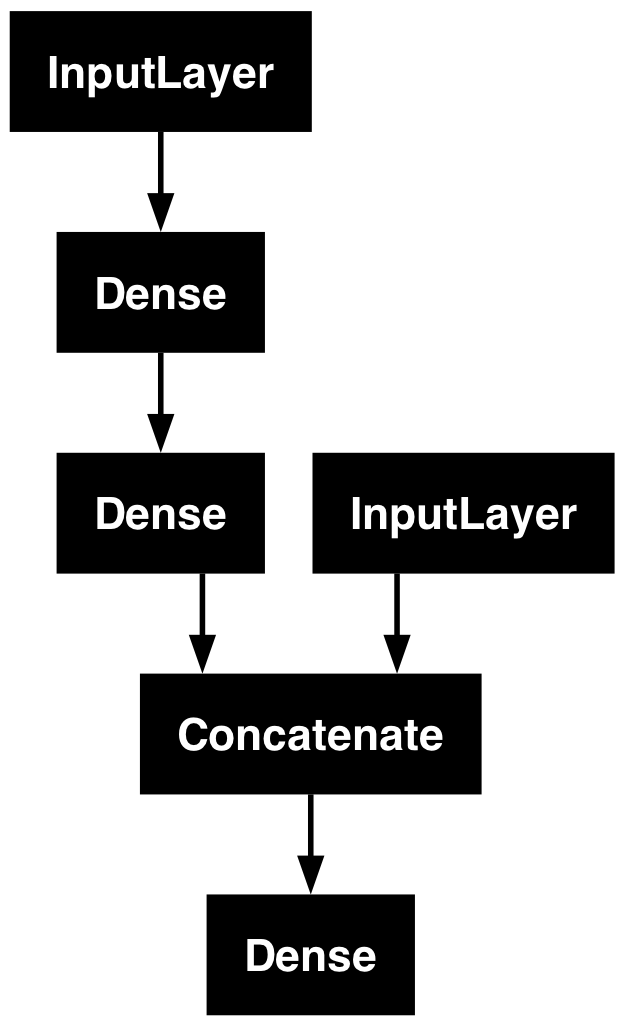

In [11]:
utils.plot_model(model)

## Multi Task Model

In [12]:
input_ = layers.Input(shape=(10, 10), name="input_")
hidden1 = layers.Dense(100, activation="relu")(input_)
hidden2 = layers.Dense(10, activation="relu")(hidden1)
output = layers.Dense(1, activation="sigmoid", name="main_output")(hidden2)
sub_out = layers.Dense(1, name="sub_output")(hidden2)

model = models.Model(inputs=[input_], outputs=[output, sub_out])
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ (InputLayer) │ (None, 10, 10)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 10, 100)   │      1,100 │ input_[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 10, 10)    │      1,010 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ main_output (Dense) │ (None, 10, 1)     │         11 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sub_output (Dense)  │ (None, 10, 1)     │         11 │ dense_12[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,132 (8.33 KB)

 Trainable params: 2,132 (8.33 KB)

 Non-trainable params: 0 (0.00 B)

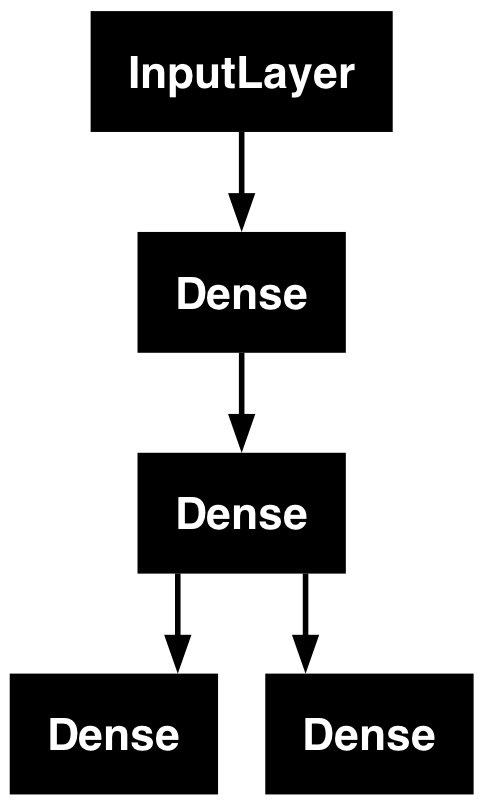

In [13]:
utils.plot_model(model)

## Multi Input, Multi Task Model

In [14]:
input_1 = layers.Input(shape=(10, 10), name='input_1')
input_2 = layers.Input(shape=(10, 28), name='input_2')
hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = layers.Dense(1, name='sub_output')(hidden2)

model = models.Model(inputs=[input_1, input_2], outputs=[output, sub_out])
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_2             │ (None, 10, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 10, 100)   │      2,900 │ input_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_1             │ (None, 10, 10)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 10, 10)    │      1,010 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 10, 20)    │          0 │ input_1[0][0],    │
│ (Concatenate)       │                   │            │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ main_output (Dense) │ (None, 10, 1)     │         21 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sub_output (Dense)  │ (None, 10, 1)     │         11 │ dense_14[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,942 (15.40 KB)

 Trainable params: 3,942 (15.40 KB)

 Non-trainable params: 0 (0.00 B)

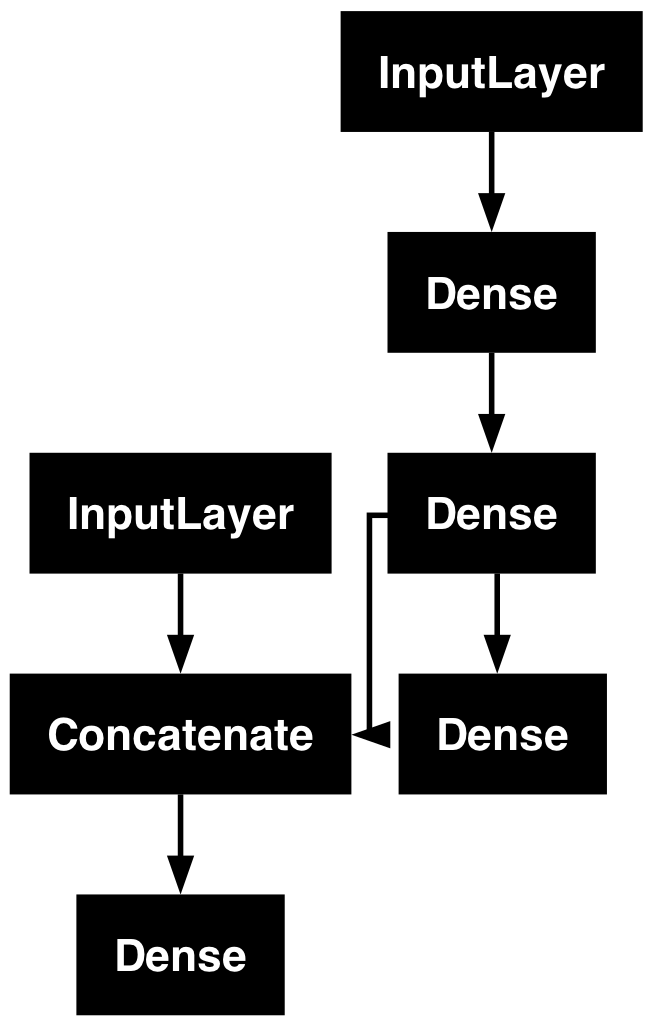

In [15]:
utils.plot_model(model)

## Subclassing API
- `fit()`: 모델 학습
- `evaluate()`: 모델 평가
- `predict()`: 모델 예측
- `save()`: 모델 저장
- `load()`: 모델 불러오기
- `call()`: 메서드 안에서 원하는 연산

In [28]:
import tensorflow as tf
class MyModel(models.Model):
    
    def __init__(self, units=30, activation="relu", **kwargs):
        super(MyModel, self).__init__(**kwargs)
        self.dense_layer1 = layers.Dense(300, activation=activation)
        self.dense_layer2 = layers.Dense(100, activation=activation)
        self.dense_layer3 = layers.Dense(units, activation=activation)
        self.output_layer = layers.Dense(10, activation="softmax")
        
    def call(self, inputs):
        x = self.dense_layer1(inputs)
        x = self.dense_layer2(x)
        x = self.dense_layer3(x)
        x = self.output_layer(x)
        return x